In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the first digit after the decimal point
def first_after_decimal(num):
    if pd.isna(num):
        return
    if str(num) == 'Null':
        return
    if str(num) == 'n. def.':
        return
#     if type(num) == str:
#         print(num)
# #         print(num.isdigit())
#         if num[0].isdigit():
#             print(num)
#             num = int(num)
#         else:
#             return
    if float(num) == 0.0:
        return
    else:
        num = float(num)
        if num > 100000:
            return(first_digit(abs(num)))
        else:
            num = float(num) * 100000
#             print(num)
            return(first_digit(abs(num)))
#     return(first_digit(abs(num)))
#     return int((abs(float(num)) * 10) % 10)

In [2]:
def first_digit(num):
    if pd.isna(num):
        return
    v = str(num)[1]
    if v == '.':
        return
#     print(int(str(num)))
    return int(str(num)[1])

In [3]:
all_files = ["Data/1.csv", "Data/5.csv", "Data/11.csv", "Data/14.csv", "Data/19_SHORT.csv", "Data/22.csv",
         "Data/25.csv", "Data/28.csv", "Data/32_LETTER.csv", "Data/34.csv", "Data/35.csv", "Data/36.csv", 
         "Data/42.csv", "Data/43.csv", "Data/47.csv", "Data/48.csv", "Data/49.csv", "Data/50.csv", 
         "Data/51.csv", "Data/53.csv", "Data/54.csv", "Data/56.csv", "Data/57_30K_25%.csv", "Data/57_30K_35%.csv", 
         "Data/57_30K_50%.csv", "Data/57_30K_75%.csv", "Data/57_30K_100%.csv", "Data/57_60K_25%.csv",
         "Data/58_lots_of_zeros.csv", "Data/59.csv", "Data/60_T3.csv", "Data/60_T4.csv", "Data/62.csv", 
         "Data/63.csv", "Data/65_peptide_PMSI_normalized.csv", "Data/65_peptide_PMSI_raw.csv", 
         "Data/65_peptide_water_normalized.csv", "Data/65_peptide_water_raw.csv", 
         "Data/65_protein_PMSI_normalized.csv", "Data/65_protein_PMSI_raw.csv", "Data/65_protein_water_normalized.csv", 
         "Data/65_protein_water_raw.csv", "Data/66_has_NA_values.csv", "Data/67.csv", "Data/68.csv", "Data/70.csv", 
         "Data/71.csv", "Data/72.csv", "Data/73.csv", "Data/74.csv", "Data/76.csv", "Data/79.csv", "Data/80.csv", 
         "Data/82.csv", "Data/84_table2.csv", "Data/84_table4_replicate1.csv", "Data/84_table4_replicate2.csv", 
         "Data/84_table4_replicate3.csv", "Data/84_table5_replicate1.csv", "Data/84_table5_replicate2.csv", 
         "Data/84_table5_replicate3.csv", "Data/85_lots_of_zeroes.csv","Data/86_S7.csv", "Data/86_S8.csv", 
         "Data/86_S9.csv", "Data/86_S10.csv", "Data/86_S11.csv", "Data/86_S12.csv", "Data/86_S14.csv",
         "Data/87_has_NA_values.csv","Data/88_table2.csv", "Data/88_table4.csv", "Data/88_table6_sheet1.csv", 
         "Data/88_table6_sheet2.csv", "Data/88_table7.csv", "Data/89_decent_number_of_zeroes.csv", 
         "Data/90_table1_imputed.csv", "Data/90_table1_raw.csv", "Data/90_table3_imputed.csv", 
         "Data/90_table3_raw.csv", "Data/90_table5_imputed.csv", "Data/90_table5_raw.csv", "Data/90_table7.csv",
         "Data/91.csv","Data/92_has_blank_cells.csv", "Data/93.csv", "Data/94.csv", "Data/95_double_digestion.csv", 
         "Data/95_single_digestion.csv", "Data/96_table1.csv", "Data/96_table2.csv", "Data/97_normalized.csv",
         "Data/97_raw.csv", "Data/99.csv", "Data/100_set1.csv", "Data/100_set2.csv"]  # "Data/5.csv","Data/28.csv","Data/35.csv","Data/53.csv",
# "Data/66_has_NA_values.csv" has weird v shape


In [4]:
df2 = pd.DataFrame(index=range(0, 10))

i = 1
for file in all_files:
    print(i)
    i += 1
    data = pd.read_csv(file, na_values=['-', 'ND'], header=[0])
    last_digits = [] #
    last_digit_dict = {}
    last_digit_freq = {}

    for column in data:
        nums = data[column]
        last_digit = [first_after_decimal(num) for num in nums]
        #last_digit = [first_digit(num) for num in nums]
        last_digits += last_digit
        last_digit_dict[column] = last_digit

    df1 = get_frequencies(last_digits)


    for key in last_digit_dict.keys():
        frequencies = get_frequencies(last_digit_dict[key])
        frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
        last_digit_freq[key] = frequencies
        message = (f"{key}"
        f"{frequencies}"
        f"")
        #print(message)
        
    df1['Percentage'] = df1['freq'] / sum(df1['freq']) * 100
    df2[file] = df1['freq'] / sum(df1['freq']) * 100

#         df1.columns = ['Element', 'Frequency']
#     df1['Percentage'] = df1['Frequency'] / sum(df1['Frequency']) * 100
#     if first:
#         df2 = df1[['Element', 'Percentage']].copy()
#         df2.rename(columns={'Percentage': file}, inplace=True)
#         first = False
#     else:
#         df2[file] = df1['Frequency'] / sum(df1['Frequency']) * 100

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


C:\Users\carol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
print(df2)

   Data/1.csv  Data/5.csv  Data/11.csv  Data/14.csv  Data/19_SHORT.csv  \
0   11.184817    9.291326    11.671651    13.207547          11.214953   
1   11.848167    6.626902    10.813789     8.962264           4.672897   
2   10.401695    4.679822    10.735086    12.028302          12.149533   
3   10.761010    3.226739    10.916103    10.613208          11.214953   
4   10.797863    6.624274     9.814261    10.377358          14.018692   
5    9.719919   13.826628     9.955926     9.198113          12.149533   
6    9.461950   15.965525     9.223989    10.849057          11.214953   
7    9.222406   14.346901     9.255470     7.075472           8.411215   
8    8.199742   13.810863     8.893436     9.669811           6.542056   
9    8.402432   11.601020     8.720290     8.018868           8.411215   

   Data/22.csv  Data/25.csv  Data/28.csv  Data/32_LETTER.csv  Data/34.csv  \
0    11.675482    12.027747    11.160714           12.068131    11.469952   
1    11.263223    11.416815    

In [10]:
df4 = pd.DataFrame(df2).T.stack().reset_index()#.drop(columns=['level_1'])
df4 = df4.rename(columns={0: "Frequency (percentage)", "level_1": "Digit"})
print(df4)

               level_0  Digit  Frequency (percentage)
0           Data/1.csv      0               11.184817
1           Data/1.csv      1               11.848167
2           Data/1.csv      2               10.401695
3           Data/1.csv      3               10.761010
4           Data/1.csv      4               10.797863
..                 ...    ...                     ...
955  Data/100_set2.csv      5                9.678373
956  Data/100_set2.csv      6                9.329446
957  Data/100_set2.csv      7                8.977042
958  Data/100_set2.csv      8                8.629274
959  Data/100_set2.csv      9                8.407572

[960 rows x 3 columns]


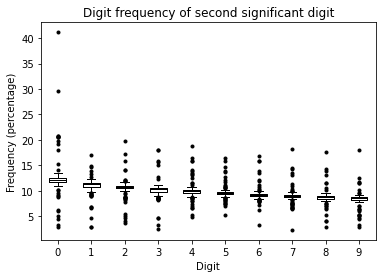

In [16]:
plt.boxplot(df2, sym="k.", medianprops=dict(color="black"), positions=[0,1,2, 3, 4, 5, 6, 7, 8, 9])
# plt.xticks([-1, 0,1,2,3,4,5,6,7,8,9, 10])
# plt.xlim(0, 9)
# plt.ylim(-1, 60)
plt.ylabel("Frequency (percentage)")
plt.xlabel("Digit")
plt.title("Digit frequency of second significant digit")
plt.savefig('Data/fig1b', dpi=300)
plt.show()

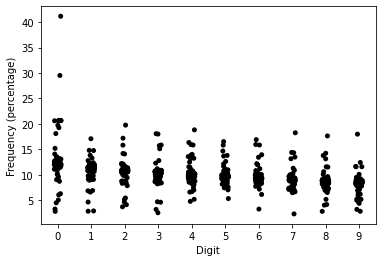

In [13]:
import seaborn as sns
sns.stripplot(x = 'Digit', y = 'Frequency (percentage)', data = df4, jitter=True, color = 'black')
# sns.stripplot(x = 'Element', y = 0, data = df5, jitter=True, color = 'blue')
# sns.despine()